In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split


In [1]:
# EN- A simple Lİnear Regression example. Reading world happinies data in: https://www.kaggle.com/unsdsn/world-happiness

In [155]:
                                        #Öznitelik Seçimi

#csv uzantılı dosyanın yolu belirtildi.

dataset= pd.read_csv("~/Desktop/2019.csv") 

In [171]:
#Dataset'in genel başlıkları açıldı.

dataset.head()  

,Overall rank,Country or region,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_To_Make_Life_Choices,Genorosity,Perceptions of corruption
0,1,Finland,1.000000,1.340,0.977217,0.986,0.596,0.153,0.393
1,2,Denmark,0.965622,1.383,0.968596,0.996,0.592,0.252,0.410
2,3,Norway,0.956265,1.488,0.974138,1.028,0.603,0.271,0.341
3,4,Iceland,0.944060,1.380,1.000000,1.026,0.591,0.354,0.118
4,5,Netherlands,0.942840,1.396,0.937192,0.999,0.557,0.322,0.298


In [157]:
#Veri tablosunun değerlerinin genel değerleri hangi özniteliklerin seçileceğine ışık tutması amacıyla
#değerlendirmeye alındı.

dataset.describe()  

,Overall rank,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_To_Make_Life_Choices,Genorosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [158]:
#Veri satırlarında boşluk olup olmadığına bakıldı. Boş yer olmadığından veri doldurma işlemi yapılmadı.

dataset.isnull().sum()  

Overall rank                    0
Country or region               0
Score                           0
GDP_per_capita                  0
Social_support                  0
Healthy_life_expectancy         0
Freedom_To_Make_Life_Choices    0
Genorosity                      0
Perceptions of corruption       0
dtype: int64

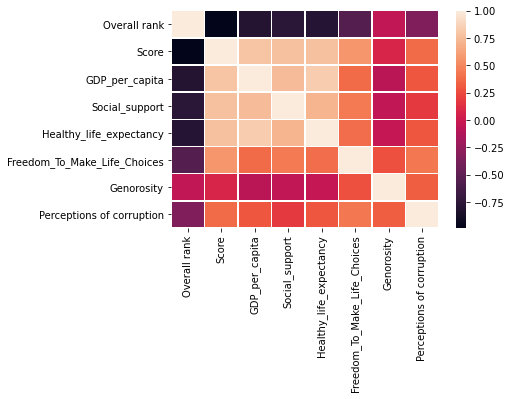

In [159]:
#Korelasyon haritası kullanıldığında; Korelasyon rengi Score özniteliğiyle en yakın açıklıkta ve diğer
# özniteliklerin geneliyle de en yakın aralıkta olan Social_support özniteliğinin seçilmesine karar verildi.

correlation= dataset.corr()
sn.heatmap(correlation, linewidths = .5)

In [160]:
#Bağımlı değişken (Y) olarak Score, bağımsız değişken olarak (X) Social support alındı.
#X ve Y Minimum-maximum normalleştirmesi yapıldı.

dataset.Social_support=(dataset.Social_support-dataset.Social_support.min())/(dataset.Social_support.max()-dataset.Social_support.min()) 
dataset.Score=(dataset.Score-dataset.Score.min())/(dataset.Score.max()-dataset.Score.min())

In [161]:
#X ve Y öznitelikleri için atamalar yapıldı. 

X=dataset.Social_support
Y=dataset.Score

In [162]:
#Lineer regresyon fonksiyonu kullanılarak X ve Y'nin regresyon bağlantısı sağlandı.

linear_reg = LinearRegression()
linear_reg.fit(X.values.reshape(-1,1),Y.values.reshape(-1,1))

LinearRegression()

In [163]:
#Özniteliklerimizin kesişme ve tahmini katsayılırı değerlerini kullanarak modelimizi oluşturduk.

print("Elde edilen regresyon modelimiz: Y={}+{}* X".format(linear_reg.intercept_,linear_reg.coef_[0]))

Elde edilen regresyon modelimiz: Y=[-0.19132827]+[0.95503722]* X


In [170]:
                                    #Performans Ölçütleri

#Tahmin edilen ve gerçekte olan değerlerin uyum oranı

y_predicted = linear_reg.predict(X.values.reshape(-1,1))
print("Verilerimiz ve modelimiz arasındaki uyum oranı: {}".format(r2_score(Y,y_predicted).round(2) *100))

Verilerimiz ve modelimiz arasındaki uyum oranı: 60.0


In [165]:
#Ortalama mutlak hata ve ortalama karesel hata çıktıları 

print("Ortalama Mutlak Hata: {} \nOrtalama Karesel Hata: {}".format(
    mean_absolute_error(Y, y_predicted), mean_squared_error(Y, y_predicted)))


Ortalama Mutlak Hata: 0.11448295197897565 
Ortalama Karesel Hata: 0.020181854813225725


In [172]:
#Ortalama Hata Karesi çıktısı

mean_squared_error(Y, y_predicted, squared=False)

0.14206285514949263

Text(0.5, 1.0, 'X, Y regresyon analizi')

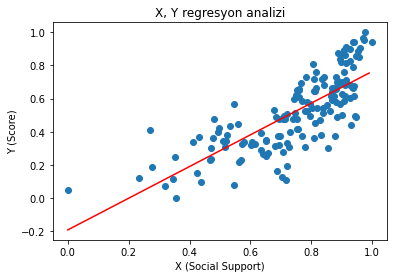

In [173]:
#Regresyon grafiğinin çizimi

random_x = np.array([0, 0.5, 0.99])
plt.scatter(X.values, Y.values)
plt.plot(random_x,
         linear_reg.intercept_[0] +
         linear_reg.coef_[0][0] * random_x,
         color='red',
         label='regresyon grafiği')
plt.xlabel('X (Social Support)')
plt.ylabel('Y (Score)')
plt.title('X, Y regresyon analizi')